# CIFAR10

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


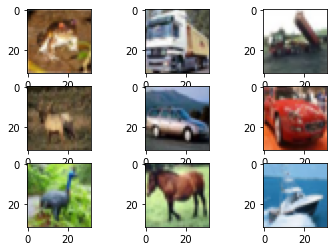

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense_5 (Dense)             (None, 512)               1573376   
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dropout_6 (Dropout)         (None, 512)              

In [ ]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from tensorflow.keras.utils import load_img,img_to_array,array_to_img
from tensorflow.keras.utils import to_categorical 
from matplotlib.pyplot import imshow

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(x_train[i])
plt.show()

#x_train = x_train.reshape(50000,3072)
#x_test = x_test.reshape(10000,3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(), metrics = ['accuracy'])
history = model.fit(x_train,y_train,batch_size = 128,epochs = 150,verbose = 1,validation_data=[x_test,y_test])

Epoch 1/150
391/391 [==============================] - 25s 63ms/step - loss: 1.6635 - accuracy: 0.4084 - val_loss: 1.5734 - val_accuracy: 0.4557
Epoch 2/150
391/391 [==============================] - 24s 62ms/step - loss: 1.6438 - accuracy: 0.4156 - val_loss: 1.6218 - val_accuracy: 0.4126
Epoch 3/150
391/391 [==============================] - 24s 62ms/step - loss: 1.6332 - accuracy: 0.4209 - val_loss: 1.5635 - val_accuracy: 0.4580
Epoch 4/150
391/391 [==============================] - 25s 64ms/step - loss: 1.6323 - accuracy: 0.4213 - val_loss: 1.5478 - val_accuracy: 0.4452
Epoch 5/150
391/391 [==============================] - 23s 60ms/step - loss: 1.6199 - accuracy: 0.4254 - val_loss: 1.5183 - val_accuracy: 0.4702
Epoch 6/150
391/391 [==============================] - 23s 59ms/step - loss: 1.6151 - accuracy: 0.4258 - val_loss: 1.6007 - val_accuracy: 0.4487
Epoch 7/150
391/391 [==============================] - 23s 58ms/step - loss: 1.6142 - accuracy: 0.4301 - val_loss: 1.5742 - val_ac

In [ ]:
model.evaluate (x_train, y_train)
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số: ',score[0])
print('Độ chính xác: ',score[1])

1563/1563 [==============================] - 12s 8ms/step - loss: 1.3284 - accuracy: 0.5586
Sai số:  1.4868143796920776
Độ chính xác:  0.4927999973297119


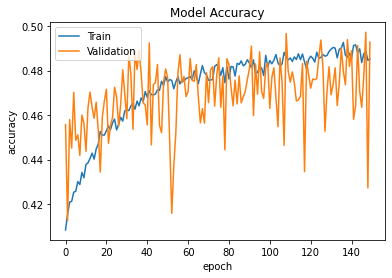

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

In [ ]:
model.save('./content/drive/MyDrive/AI_EXAM/Cifar10.h5')

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('./content/drive/MyDrive/AI_EXAM/Cifar10.h5')

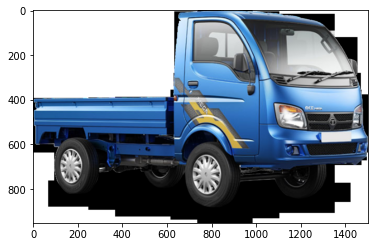

In [ ]:
plt.imshow(load_img('/content/drive/MyDrive/AI_TEST/xe2.png'))

array([1])

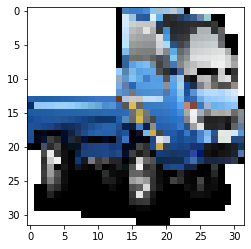

In [ ]:
from tensorflow.keras.models import load_model

filename = '/content/drive/MyDrive/AI_TEST/xe2.png'
img=load_img(filename,target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=1)